# UCI Breast Cancer Dataset - Preprocessing

**Project**: Breast Cancer Detection using Machine Learning

**Dataset**: UCI Breast Cancer Wisconsin (Diagnostic) Dataset

This notebook performs the following preprocessing steps:
1. Load the dataset
2. Exploratory Data Analysis (EDA)
3. Check for missing and inconsistent values
4. Encode target labels (M=Malignant, B=Benign)
5. Standardize features using StandardScaler
6. Split dataset into training and testing sets


## 1. Import Required Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Load the Dataset

We'll load the UCI Breast Cancer Wisconsin (Diagnostic) dataset from the wdbc.data file.


In [2]:
# Define feature names based on UCI dataset documentation
# 10 base features × 3 (mean, standard error, worst) = 30 features
base_features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 
                 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal dimension']

feature_names = []
for stat in ['mean', 'se', 'worst']:
    for feature in base_features:
        feature_names.append(f"{feature}_{stat}")

# Define all column names (ID, Diagnosis, 30 features)
column_names = ['id', 'diagnosis'] + feature_names

# Load the dataset from wdbc.data file
df = pd.read_csv('uci_breast_cancer_dataset/wdbc.data', header=None, names=column_names)

print(f"✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {len(df.columns)}")
print(f"  - ID: 1")
print(f"  - Diagnosis: 1")
print(f"  - Features: {len(feature_names)}")
print(f"\nTotal samples: {len(df)}")
print(f"\nFirst few rows:")
df.head()


✓ Dataset loaded successfully!
Shape: (569, 32)

Columns: 32
  - ID: 1
  - Diagnosis: 1
  - Features: 30

Total samples: 569

First few rows:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

## 3. Exploratory Data Analysis (EDA)


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal dimension_worst  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678

In [4]:
# Display dataset info
print("Dataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perim

In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe()


Statistical Summary:


id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

Target Distribution:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


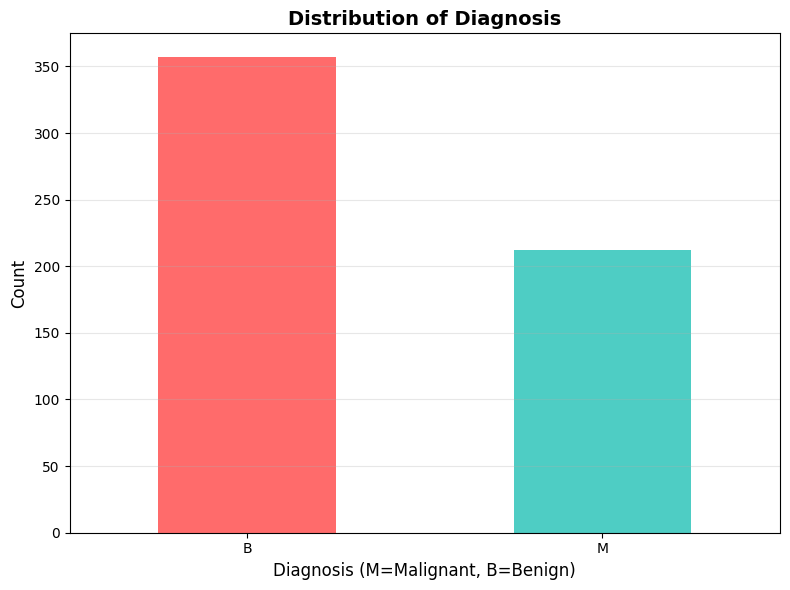

In [6]:
# Check target distribution
print("Target Distribution:")
print(df['diagnosis'].value_counts())
print(f"\nPercentage:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

# Visualize target distribution
plt.figure(figsize=(8, 6))
df['diagnosis'].value_counts().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis (M=Malignant, B=Benign)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Data Cleaning - Check for Missing and Inconsistent Values


In [7]:
# Check for missing values
print("Missing Values Check:")
missing_values = df.isnull().sum()
print(f"\nTotal missing values: {missing_values.sum()}")

if missing_values.sum() > 0:
    print("\nColumns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("\n✓ No missing values found!")


Missing Values Check:

Total missing values: 0

✓ No missing values found!


In [8]:
# Check for duplicate rows
print("Duplicate Rows Check:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")
else:
    print("✓ No duplicate rows found!")


Duplicate Rows Check:
Number of duplicate rows: 0
✓ No duplicate rows found!


In [9]:
# Check for inconsistent values (negative values, outliers)
print("Checking for negative values (which shouldn't exist in this dataset):")
negative_counts = (df[feature_names] < 0).sum()

if negative_counts.sum() > 0:
    print("\nColumns with negative values:")
    print(negative_counts[negative_counts > 0])
else:
    print("✓ No negative values found!")


Checking for negative values (which shouldn't exist in this dataset):
✓ No negative values found!


In [10]:
# Check data types
print("Data Types:")
print(df.dtypes.value_counts())
print("\n✓ All feature columns are numeric (float64)")


Data Types:
float64    30
int64       1
object      1
Name: count, dtype: int64

✓ All feature columns are numeric (float64)


## 5. Feature Correlation Analysis


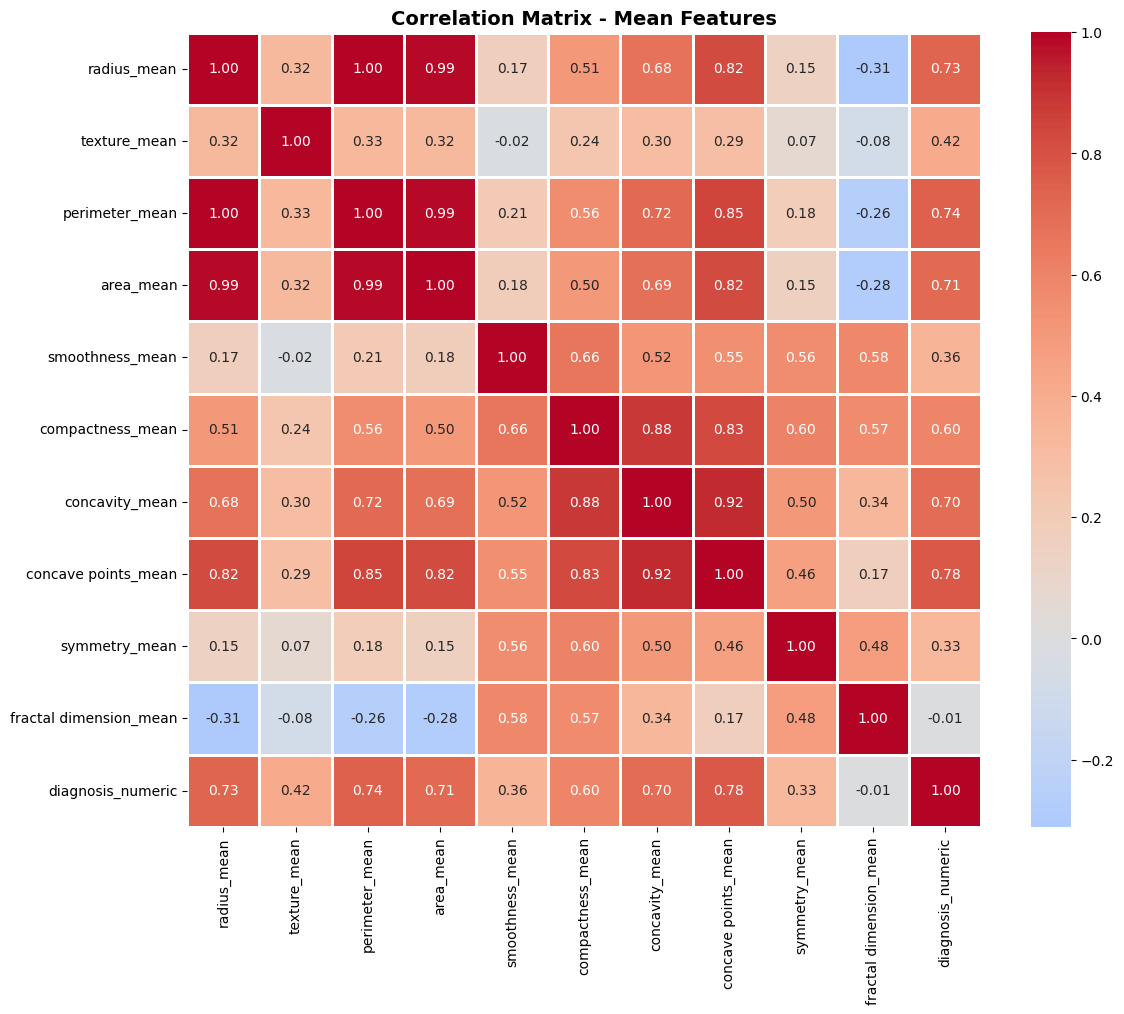

In [11]:
# Correlation matrix for a subset of features (to keep visualization readable)
# Select mean features only
mean_features = [col for col in feature_names if 'mean' in col]

# Create a numeric version of diagnosis for correlation
df['diagnosis_numeric'] = df['diagnosis'].map({'M': 1, 'B': 0})

plt.figure(figsize=(12, 10))
correlation_matrix = df[mean_features + ['diagnosis_numeric']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix - Mean Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


## 6. Encode Target Labels

Convert diagnosis labels from categorical (M/B) to numeric:
- M (Malignant) → 1
- B (Benign) → 0


In [12]:
# Create label encoder
label_encoder = LabelEncoder()

# Encode the diagnosis column
# M (Malignant) = 1, B (Benign) = 0
df['diagnosis_encoded'] = label_encoder.fit_transform(df['diagnosis'])

# Verify encoding
print("Label Encoding Verification:")
print(df[['diagnosis', 'diagnosis_encoded']].drop_duplicates().sort_values('diagnosis'))
print("\n✓ Labels encoded successfully!")
print("  M (Malignant) → 1")
print("  B (Benign) → 0")


Label Encoding Verification:
   diagnosis  diagnosis_encoded
19         B                  0
0          M                  1

✓ Labels encoded successfully!
  M (Malignant) → 1
  B (Benign) → 0


## 7. Prepare Features and Target


In [13]:
# Separate features and target
X = df[feature_names]  # All 30 features
y = df['diagnosis_encoded']  # Encoded target (0=Benign, 1=Malignant)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nFeature names ({len(feature_names)} total):")
for i, feature in enumerate(feature_names, 1):
    print(f"{i:2d}. {feature}")


Features (X) shape: (569, 30)
Target (y) shape: (569,)

Feature names (30 total):
 1. radius_mean
 2. texture_mean
 3. perimeter_mean
 4. area_mean
 5. smoothness_mean
 6. compactness_mean
 7. concavity_mean
 8. concave points_mean
 9. symmetry_mean
10. fractal dimension_mean
11. radius_se
12. texture_se
13. perimeter_se
14. area_se
15. smoothness_se
16. compactness_se
17. concavity_se
18. concave points_se
19. symmetry_se
20. fractal dimension_se
21. radius_worst
22. texture_worst
23. perimeter_worst
24. area_worst
25. smoothness_worst
26. compactness_worst
27. concavity_worst
28. concave points_worst
29. symmetry_worst
30. fractal dimension_worst


## 8. Split Dataset into Training and Testing Sets


In [14]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution
)

print("Dataset Split:")
print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nClass distribution in training set:")
print(y_train.value_counts())
print("\nClass distribution in testing set:")
print(y_test.value_counts())


Dataset Split:
Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Class distribution in training set:
diagnosis_encoded
0    285
1    170
Name: count, dtype: int64

Class distribution in testing set:
diagnosis_encoded
0    72
1    42
Name: count, dtype: int64


## 9. Standardize Features using StandardScaler

Standardization transforms features to have mean=0 and standard deviation=1


In [15]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for better visualization
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names, index=X_test.index)

print("✓ Features standardized successfully!")
print(f"\nScaled training data shape: {X_train_scaled.shape}")
print(f"Scaled testing data shape: {X_test_scaled.shape}")


✓ Features standardized successfully!

Scaled training data shape: (455, 30)
Scaled testing data shape: (114, 30)


In [16]:
# Verify standardization (mean ≈ 0, std ≈ 1)
print("Verification of Standardization (Training Set):")
print(f"Mean of scaled features: {X_train_scaled.mean(axis=0).mean():.6f} (should be ≈ 0)")
print(f"Std of scaled features: {X_train_scaled.std(axis=0).mean():.6f} (should be ≈ 1)")

# Show statistics for first few features
print("\nStatistics for first 5 features (before and after scaling):")
print("\nBEFORE Scaling:")
print(X_train.iloc[:, :5].describe().loc[['mean', 'std']])
print("\nAFTER Scaling:")
print(X_train_scaled_df.iloc[:, :5].describe().loc[['mean', 'std']])


Verification of Standardization (Training Set):
Mean of scaled features: 0.000000 (should be ≈ 0)
Std of scaled features: 1.000000 (should be ≈ 1)

Statistics for first 5 features (before and after scaling):

BEFORE Scaling:
      radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean
mean    14.166077     19.417692       92.215868  659.578242         0.095993
std      3.579081      4.290653       24.717118  360.418686         0.014310

AFTER Scaling:
       radius_mean  texture_mean  perimeter_mean     area_mean  \
mean -1.737316e-16  3.904081e-16    4.704418e-16 -1.171224e-16   
std   1.001101e+00  1.001101e+00    1.001101e+00  1.001101e+00   

      smoothness_mean  
mean     7.242070e-16  
std      1.001101e+00  


## 10. Visualize Feature Distributions (Before vs After Scaling)


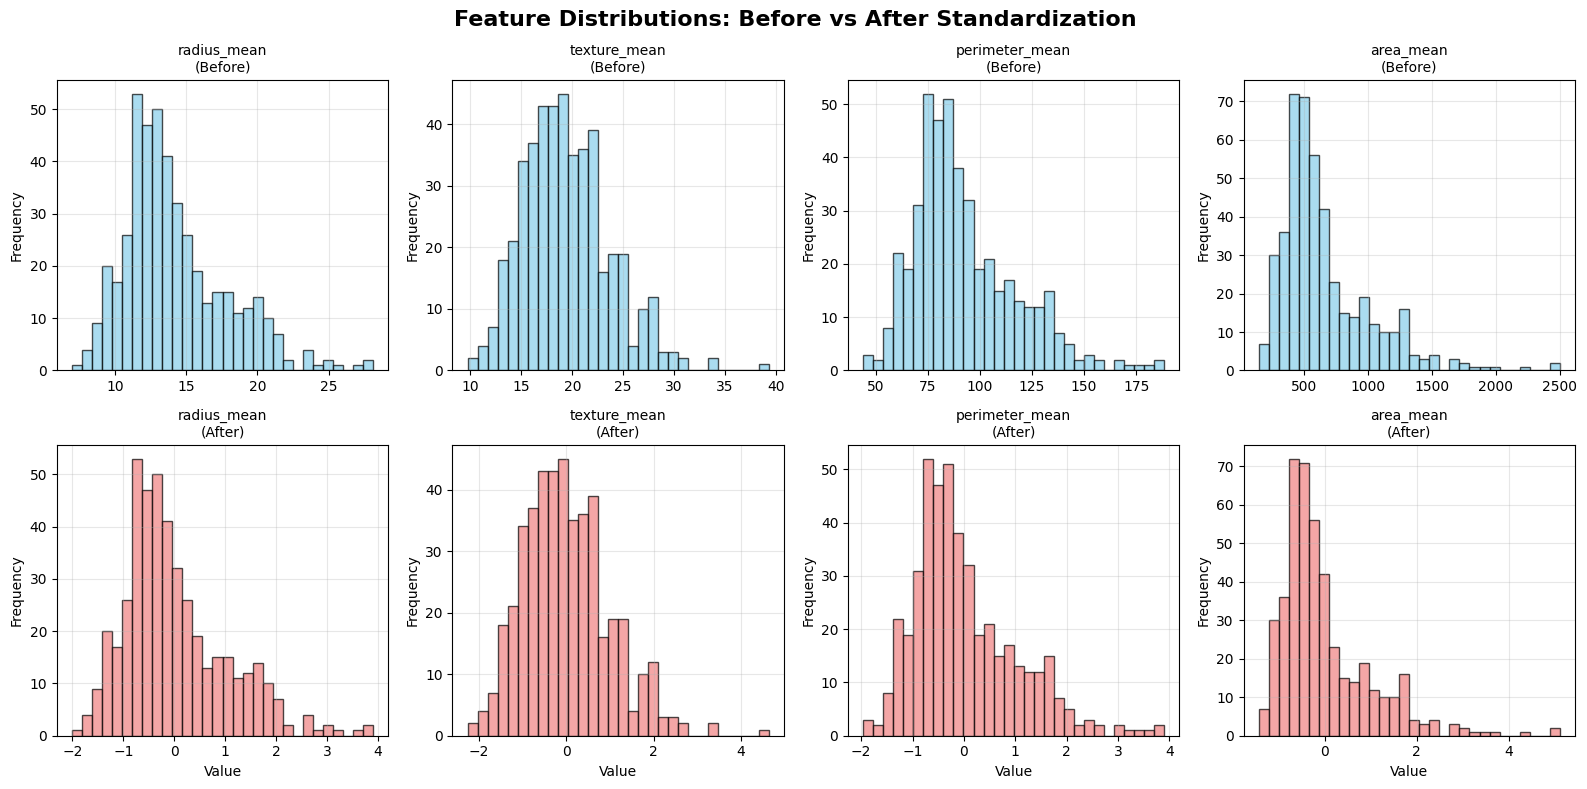

In [17]:
# Compare distributions before and after scaling for a few features
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Feature Distributions: Before vs After Standardization', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features_to_plot):
    # Before scaling
    axes[0, idx].hist(X_train[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[0, idx].set_title(f'{feature}\n(Before)', fontsize=10)
    axes[0, idx].set_ylabel('Frequency')
    axes[0, idx].grid(alpha=0.3)
    
    # After scaling
    axes[1, idx].hist(X_train_scaled_df[feature], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[1, idx].set_title(f'{feature}\n(After)', fontsize=10)
    axes[1, idx].set_xlabel('Value')
    axes[1, idx].set_ylabel('Frequency')
    axes[1, idx].grid(alpha=0.3)

plt.tight_layout()
plt.show()


## 11. Save Preprocessed Data


In [18]:
# Save preprocessed data to CSV files
# Create data directory if it doesn't exist
os.makedirs('data/processed', exist_ok=True)

# Save scaled training data
X_train_scaled_df.to_csv('data/processed/X_train_scaled.csv', index=False)
y_train.to_csv('data/processed/y_train.csv', index=False, header=True)

# Save scaled testing data
X_test_scaled_df.to_csv('data/processed/X_test_scaled.csv', index=False)
y_test.to_csv('data/processed/y_test.csv', index=False, header=True)

# Save the scaler for future use
joblib.dump(scaler, 'data/processed/scaler.pkl')

# Also save feature names for reference
with open('data/processed/feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")

print("✓ Preprocessed data saved successfully!")
print("\nSaved files:")
print("  - data/processed/X_train_scaled.csv")
print("  - data/processed/y_train.csv")
print("  - data/processed/X_test_scaled.csv")
print("  - data/processed/y_test.csv")
print("  - data/processed/scaler.pkl")
print("  - data/processed/feature_names.txt")


✓ Preprocessed data saved successfully!

Saved files:
  - data/processed/X_train_scaled.csv
  - data/processed/y_train.csv
  - data/processed/X_test_scaled.csv
  - data/processed/y_test.csv
  - data/processed/scaler.pkl
  - data/processed/feature_names.txt


## 12. Summary of Preprocessing Steps


In [19]:
print("="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"\n1. Dataset Loaded:")
print(f"   - Source: uci_breast_cancer_dataset/wdbc.data")
print(f"   - Total samples: {len(df)}")
print(f"   - Total features: {len(feature_names)}")
print(f"   - Malignant cases: {(df['diagnosis'] == 'M').sum()}")
print(f"   - Benign cases: {(df['diagnosis'] == 'B').sum()}")

print(f"\n2. Data Cleaning:")
print(f"   - Missing values: 0")
print(f"   - Duplicate rows: 0")
print(f"   - Negative values: 0")

print(f"\n3. Label Encoding:")
print(f"   - M (Malignant) → 1")
print(f"   - B (Benign) → 0")

print(f"\n4. Train-Test Split:")
print(f"   - Training samples: {len(X_train)} (80%)")
print(f"   - Testing samples: {len(X_test)} (20%)")

print(f"\n5. Feature Standardization:")
print(f"   - Method: StandardScaler")
print(f"   - Mean ≈ 0, Std ≈ 1")

print(f"\n6. Data Saved:")
print(f"   - Location: data/processed/")
print(f"   - Files: CSV format + scaler pickle")

print("\n" + "="*60)
print("✓ PREPROCESSING COMPLETE - Ready for Model Training!")
print("="*60)


PREPROCESSING SUMMARY

1. Dataset Loaded:
   - Source: uci_breast_cancer_dataset/wdbc.data
   - Total samples: 569
   - Total features: 30
   - Malignant cases: 212
   - Benign cases: 357

2. Data Cleaning:
   - Missing values: 0
   - Duplicate rows: 0
   - Negative values: 0

3. Label Encoding:
   - M (Malignant) → 1
   - B (Benign) → 0

4. Train-Test Split:
   - Training samples: 455 (80%)
   - Testing samples: 114 (20%)

5. Feature Standardization:
   - Method: StandardScaler
   - Mean ≈ 0, Std ≈ 1

6. Data Saved:
   - Location: data/processed/
   - Files: CSV format + scaler pickle

✓ PREPROCESSING COMPLETE - Ready for Model Training!
